 # Name: Saphal Shakha

## Prediction Using Decision Tree Algorithm
   
## 1. Problem 

The purpose is if we feed any new data to this decison tree classifier, it should be able to predict the right class accordingly.

## 2. Data

The data we're using is the dataset from : https://bit.ly/3kXTdox , which is the data of Iris flower.

## 3. Evaluation

We try to evaluate/predict correct class of Iris species from the given Iris data, evaluating the Sepal-Length, Sepal-Width, Petal-Length and Petal-Width measured in Centimeters(Cm).

    

### Importing necesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading Data

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Overview of Data

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking null values

In [4]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Description of data

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### From this description we know that there are 150 rows of data. Similarly the mean, std,max  and other information of Sepal and Petal lengths denotes different species of Iris.

### Let's pre-process our data 

In [6]:
iris.drop('Id', axis=1,inplace=True) #Dropping Id column

In [7]:
iris.head()  #Clean data after dropping Id 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Plot to show no. of species

In [8]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

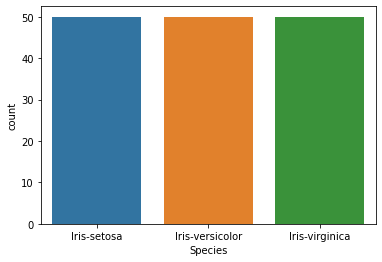

In [9]:
sns.countplot(iris['Species']);

### There are 50 datas of each species.

### Let's see pairwise relationships with PairPlot

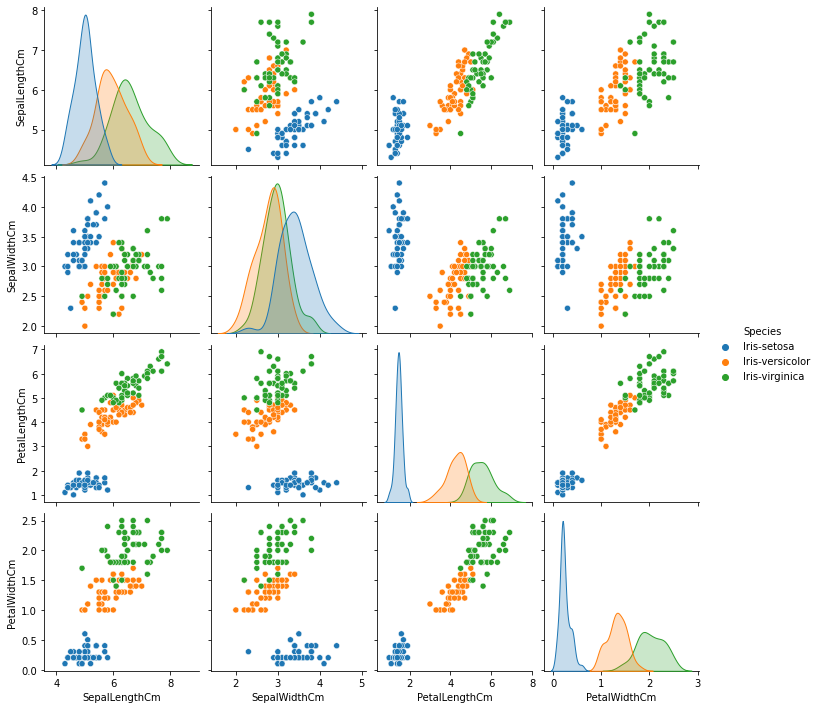

In [10]:
sns.pairplot(iris,hue='Species');

### This shows the data distribution of each species of each columns. Each species can be seen in distinct clusters.

### Let's visulalize the correlation with heatmap

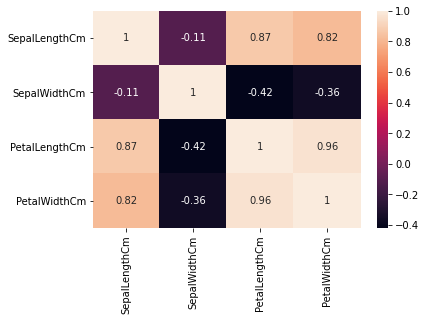

In [11]:
sns.heatmap(iris.corr(),annot=True);

### This shows the correlation of each columns. Greater positive values denote hightly correlated.

### Histogram of data distribution

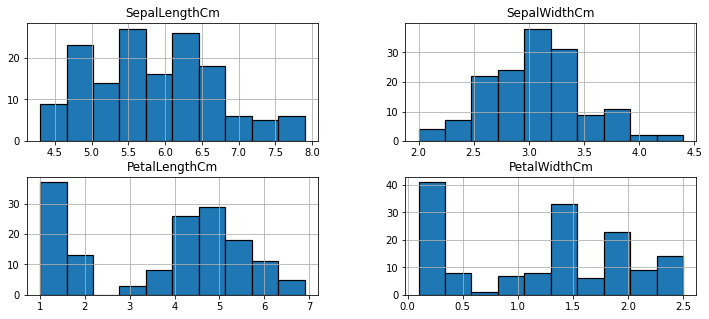

In [12]:
iris.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,5)

## Let's further pre-process our data for evaluation

### Normalizing the values using Min-Max-Scaler

In [26]:
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in iris.columns:
    if iris[col].dtype in['int64','float64']:
       iris[col]=scaler.fit_transform(iris[[col]])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


### By using Min-Max-Scaler we're scaling the values of all Features in range [0,1].

### Label Encoding

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


### By label-encoding the object type column i.e.['Species'] column, we'can now evalute 3 species distincted with numbers 0, 1, and 2. 

In [50]:
iris.Species.unique()

array([0, 1, 2])

### Train-Test split data into ratio 80:20

In [51]:
X = iris.drop('Species',1)    # feature
y = iris['Species']           # Target

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Feature selection using PCA

In [99]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [100]:
explained_variance = pca.explained_variance_ratio_
explained_variance  #variance of each column

array([0.84180534, 0.13040401, 0.02184205, 0.0059486 ])

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### Building Decision Tree CLassifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicting values of test data

In [103]:
y_pred = model.predict(X_test)
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2])

### Finding accuracy of model

In [104]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9666666666666667

In [105]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

In [106]:
print(f"THE ACCURACY OF MODEL IS : {accuracy_score(y_test,y_pred)*100:.2f} % ")

THE ACCURACY OF MODEL IS : 96.67 % 


....

### Visual Representation of Decision Tree

In [120]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


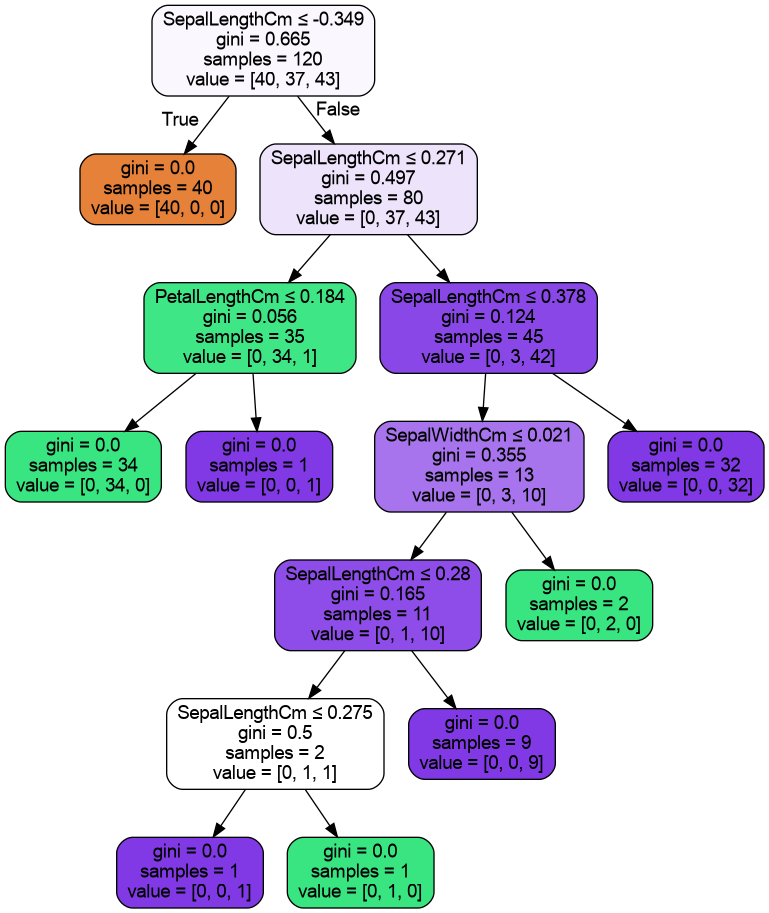

In [123]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())